# Logistic Regression for Imblanced Dataset

In [107]:
from collections import Counter
from sklearn.datasets import make_classification

In [117]:

# Generate an imbalanced dataset
x, y = make_classification(
    n_samples=10000,              # Number of samples
    n_features=2,                 # Number of features
    n_clusters_per_class=1,      # Number of clusters per class
    n_redundant=0,                # Number of redundant features
    weights=[0.99],               # Class distribution (0.99 for the majority class)
    random_state=10               # Seed for reproducibility
)

In [118]:
x

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [119]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [120]:
import seaborn as sns

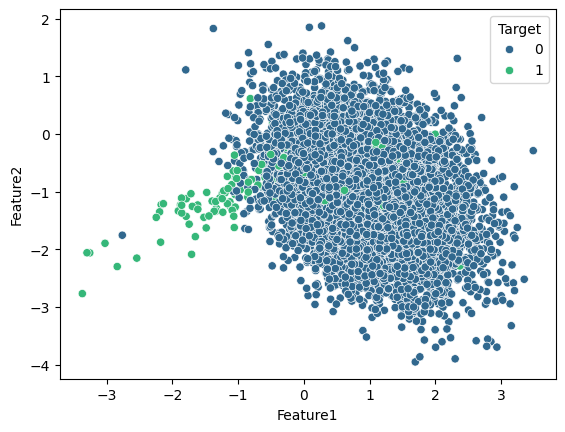

In [123]:
# Create a DataFrame from the features and target
df = pd.DataFrame(x, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Plot using seaborn
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Target', palette='viridis')

# Show the plot
plt.show()

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state = 0)

In [125]:
# hyper parametr tunning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
class_weight = [{0:w,1:y} for w in[1,10,50,100] for y in [1,10,50,100]]         

In [135]:
params = dict(penalty = penalty , C=c_values ,solver = solver , class_weight =class_weight) 

In [136]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid = GridSearchCV(estimator = model ,param_grid = params , scoring = 'accuracy',cv =cv ,n_jobs =-1 )

In [138]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [139]:
grid.best_score_

np.float64(0.9881333333333334)

In [140]:
import warnings 
warnings.filterwarnings("ignore")

In [141]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [142]:
y_pred = grid.predict(x_test)

In [143]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.992
[[2468    2]
 [  18   12]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500

